**🔧 Phase 1: Load & Explore the Data**

*📌 Cell 1: Import Required Libraries*



In [ ]:
# Data Manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting Style
plt.style.use("ggplot")  # Using ggplot as a clean alternative
sns.set_palette("Set2")

# Enable interactive plots in notebook
%matplotlib inline


*📌 Cell 2: Load Datasets*

In [ ]:
# Load the uploaded datasets from mounted Google Drive path
unemployment_df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB PROJECT DATASET/archive/Unemployment in India.csv")
unemployment_rate_df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB PROJECT DATASET/archive/Unemployment_Rate_upto_11_2020.csv")
industry_df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB PROJECT DATASET/Industrywisedatasupto_dipp.csv")


*📌 Cell 3: Preview Datasets*

In [ ]:
# Preview top rows of each dataset to understand the structure
print("📍 Unemployment Dataset (1):")
display(unemployment_df.head())

print("\n📍 Unemployment Rate Dataset (2):")
display(unemployment_rate_df.head())

print("\n📍 Industry-wise Dataset (3):")
display(industry_df.head())


📍 Unemployment Dataset (1):


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



📍 Unemployment Rate Dataset (2):


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74



📍 Industry-wise Dataset (3):


,Name_of_the_Schedule_Industry,NUMBER,INVESTMENT,EMPLOYMENT,Last_Updated
0,AGRICULTURAL MACHINERY,233,12338,63642,11-10-2022
1,BOILERS&STEAM GENERATING PLANTS,10,2294,3106,11-10-2022
2,BOILERS&STEAM GENERATING PLANTS,46,3962,10500,11-10-2022
3,CEMENT & GYPSUM PRODUCTS,2933,732593,864577,11-10-2022
4,CERAMICS,1128,36992,224238,11-10-2022


*📌 Cell 4: Dataset Health Check – Info + Nulls*

In [ ]:
def check_dataset_health(df, name):
    print(f"🔍 Dataset: {name}")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("-" * 50)

check_dataset_health(unemployment_df, "Unemployment in India.csv")
check_dataset_health(unemployment_rate_df, "Unemployment Rate upto 11 2020.csv")
check_dataset_health(industry_df, "Industry-wise Investment and Employment")


🔍 Dataset: Unemployment in India.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Missing Values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Es

**Phase 2: Data Cleaning (Cells 5–8)**

*🧹 Cell 5: Rename Columns for Consistency*

In [ ]:
# Renaming columns for clarity and consistent formatting
unemployment_df.columns = unemployment_df.columns.str.strip().str.replace(' ', '_')
unemployment_rate_df.columns = unemployment_rate_df.columns.str.strip().str.replace(' ', '_')
industry_df.columns = industry_df.columns.str.strip().str.replace(' ', '_')

# Print to confirm column renaming
print("✅ Column names standardized:")
print("Unemployment:", unemployment_df.columns.tolist())
print("Unemployment Rate:", unemployment_rate_df.columns.tolist())
print("Industry-wise:", industry_df.columns.tolist())


✅ Column names standardized:
Unemployment: ['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Area']
Unemployment Rate: ['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Region.1', 'longitude', 'latitude']
Industry-wise: ['Name_of_the_Schedule_Industry', 'NUMBER', 'INVESTMENT', 'EMPLOYMENT', 'Last_Updated']


*🧽 Cell 6: Convert Dates to Datetime Format*

In [ ]:
# Converting 'Date' columns to datetime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'], errors='coerce')
unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df['Date'], errors='coerce')

# Confirm conversion
print("📆 Sample Dates:")
print(unemployment_df['Date'].head())
print(unemployment_rate_df['Date'].head())

📆 Sample Dates:
0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]
0   2020-01-31
1   2020-02-29
2   2020-03-31
3   2020-04-30
4   2020-05-31
Name: Date, dtype: datetime64[ns]


<ipython-input-65-2943bab97711>:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-65-2943bab97711>:3: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



*🧼 Cell 7: Drop Duplicates and Handle Nulls (Basic Cleaning)*

In [ ]:
# Drop duplicates if any
unemployment_df.drop_duplicates(inplace=True)
unemployment_rate_df.drop_duplicates(inplace=True)
industry_df.drop_duplicates(inplace=True)

# Handle nulls - simple removal for now
unemployment_df.dropna(inplace=True)
unemployment_rate_df.dropna(inplace=True)
industry_df.dropna(inplace=True)

print("✅ Cleaned basic nulls and duplicates.")
print(f"Unemployment Shape: {unemployment_df.shape}")
print(f"Unemployment Rate Shape: {unemployment_rate_df.shape}")
print(f"Industry Dataset Shape: {industry_df.shape}")

✅ Cleaned basic nulls and duplicates.
Unemployment Shape: (740, 7)
Unemployment Rate Shape: (267, 9)
Industry Dataset Shape: (49, 5)


*🔎 Cell 8: Standardize Industry Dataset (Numeric Formatting)*

In [ ]:
# Remove commas and convert INVESTMENT & EMPLOYMENT columns to numeric
industry_df['INVESTMENT'] = industry_df['INVESTMENT'].replace('[,₹]', '', regex=True).astype(float)
industry_df['EMPLOYMENT'] = industry_df['EMPLOYMENT'].replace('[,₹]', '', regex=True).astype(float)

# Confirm types
print("🔢 Column Types after formatting:")
print(industry_df[['INVESTMENT', 'EMPLOYMENT']].dtypes)

🔢 Column Types after formatting:
INVESTMENT    float64
EMPLOYMENT    float64
dtype: object


**📊 Phase 3: Exploratory Data Analysis (EDA) & Visualizations**

*📌 Cell 9: Unemployment Rate Over Time (National Trend)*

<ipython-input-68-8d0253ae1b49>:11: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



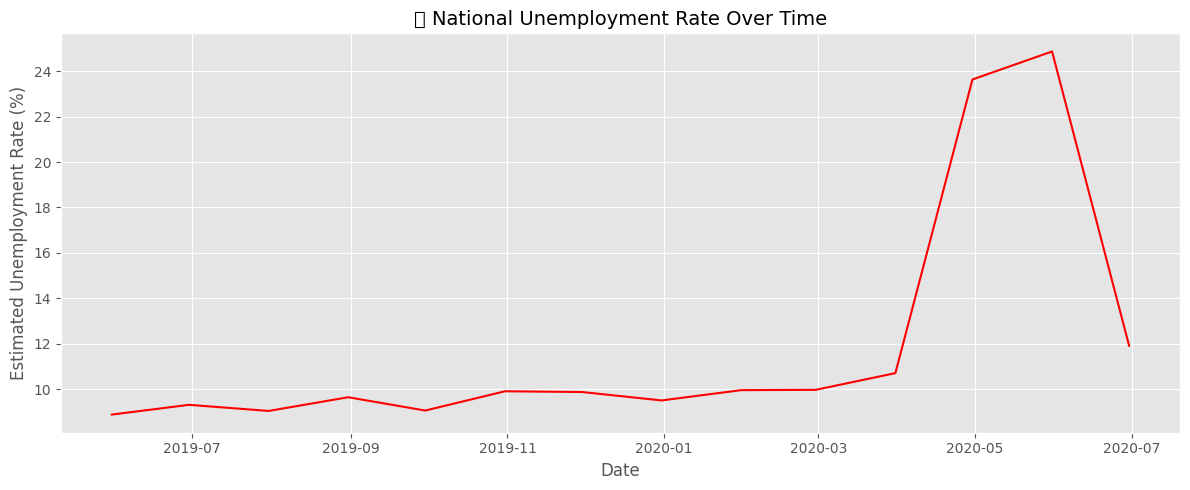

In [ ]:
# Grouping by Date to get average national trend
national_trend = unemployment_df.groupby('Date')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=national_trend, x='Date', y='Estimated_Unemployment_Rate_(%)', color='red')
plt.title("📈 National Unemployment Rate Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


*📌 Cell 10: Region-Wise Unemployment Rate – June 2020*

<ipython-input-69-494bf6d2370b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




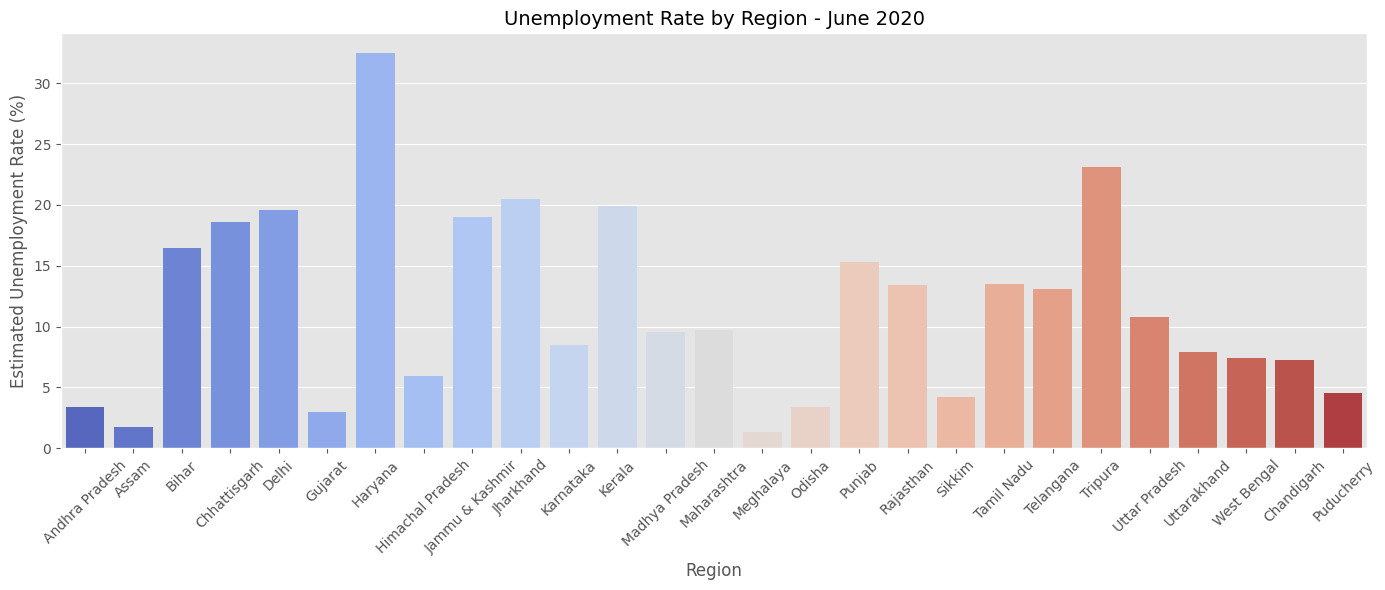

In [ ]:
# Taking the latest date's data for regional breakdown
latest_date = unemployment_df['Date'].max()
latest_data = unemployment_df[unemployment_df['Date'] == latest_date]

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=latest_data, x='Region', y='Estimated_Unemployment_Rate_(%)', palette='coolwarm', errorbar=None)  # Remove error bars
plt.title("Unemployment Rate by Region - June 2020", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Estimated Unemployment Rate (%)")
plt.tight_layout()
plt.show()

*📌 Cell 11: Top 10 Regions with Highest Unemployment Rates*

In [ ]:
# Sort the latest data (June 2020) by unemployment rate in descending order
june_data_sorted = latest_data.sort_values(by='Estimated_Unemployment_Rate_(%)', ascending=False)

# Display top 10 regions with highest unemployment rates in June 2020
top10_regions = june_data_sorted[['Region', 'Estimated_Unemployment_Rate_(%)']].head(10)
print("🔝 Top 10 Regions with Highest Unemployment Rate (June 2020):")
display(top10_regions)

🔝 Top 10 Regions with Highest Unemployment Rate (June 2020):


,Region,Estimated_Unemployment_Rate_(%)
107,Haryana,35.57
494,Haryana,29.41
174,Kerala,27.66
711,Tripura,27.47
440,Chhattisgarh,27.07
683,Tamil Nadu,24.93
146,Jharkhand,21.53
67,Delhi,21.14
39,Bihar,20.49
256,Punjab,20.00


*📌 Cell 12: Correlation Heatmap – Unemployment Features*

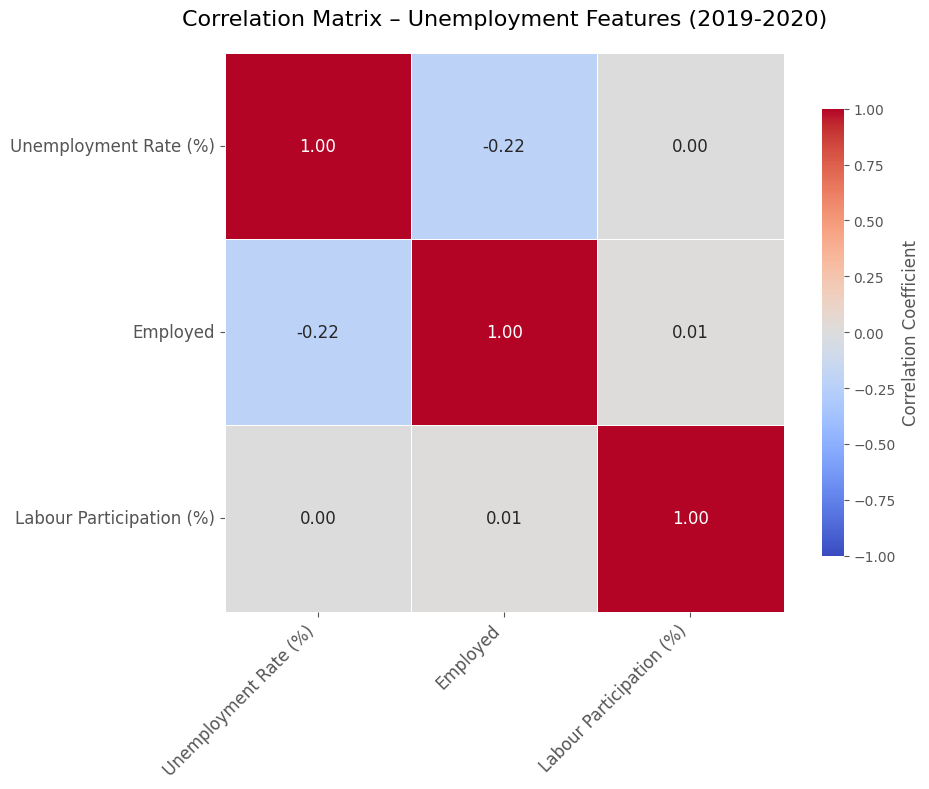

In [ ]:
# Select numeric columns for correlation
num_cols = ['Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)']
corr_matrix = unemployment_df[num_cols].corr()

# Rename columns for concise labels
corr_matrix.columns = ['Unemployment Rate (%)', 'Employed', 'Labour Participation (%)']
corr_matrix.index = ['Unemployment Rate (%)', 'Employed', 'Labour Participation (%)']

# Plot heatmap with improvements
plt.figure(figsize=(10, 8))  # Larger figure size for better visibility
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values
    annot_kws={'size': 12},  # Increase font size of annotations
    cmap='coolwarm',  # Diverging palette for positive/negative correlations
    fmt=".2f",  # Format numbers to 2 decimal places
    vmin=-1, vmax=1,  # Set color scale range
    center=0,  # Center the colormap at 0
    square=True,  # Make cells square
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},  # Add label to color bar and adjust size
    linewidths=0.5,  # Add borders between cells for structure
    linecolor='white',  # White borders for clarity
)

# Customize labels and title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels, adjust font size
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal, adjust font size
plt.title("Correlation Matrix – Unemployment Features (2019-2020)", fontsize=16, pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot to a file (as per guidelines)
plt.savefig('correlation_matrix.png')

****

*📌 Cell 13: Geo-Plot of June 2020 Unemployment Rates*

In [ ]:
# Debug: Check available dates
print("Available dates in unemployment_rate_df:")
print(unemployment_rate_df['Date'].unique())

# Filter for June 2020
june_geo_data = unemployment_rate_df[unemployment_rate_df['Date'] == pd.to_datetime('2020-06-30')].copy()
print("\nJune 2020 data:")
print(june_geo_data[['Region', 'Estimated_Unemployment_Rate_(%)', 'latitude', 'longitude']].head())

Available dates in unemployment_rate_df:
<DatetimeArray>
['2020-01-31 00:00:00', '2020-02-29 00:00:00', '2020-03-31 00:00:00',
 '2020-04-30 00:00:00', '2020-05-31 00:00:00', '2020-06-30 00:00:00',
 '2020-07-31 00:00:00', '2020-08-31 00:00:00', '2020-09-30 00:00:00',
 '2020-10-31 00:00:00']
Length: 10, dtype: datetime64[ns]

June 2020 data:
            Region  Estimated_Unemployment_Rate_(%)  latitude  longitude
5   Andhra Pradesh                             3.31   79.7400    15.9129
15           Assam                             0.60   92.9376    26.2006
25           Bihar                            17.82   85.3131    25.0961
35    Chhattisgarh                            14.23   81.8661    21.2787
45           Delhi                            18.19   77.1025    28.7041


<ipython-input-73-46af97421aea>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




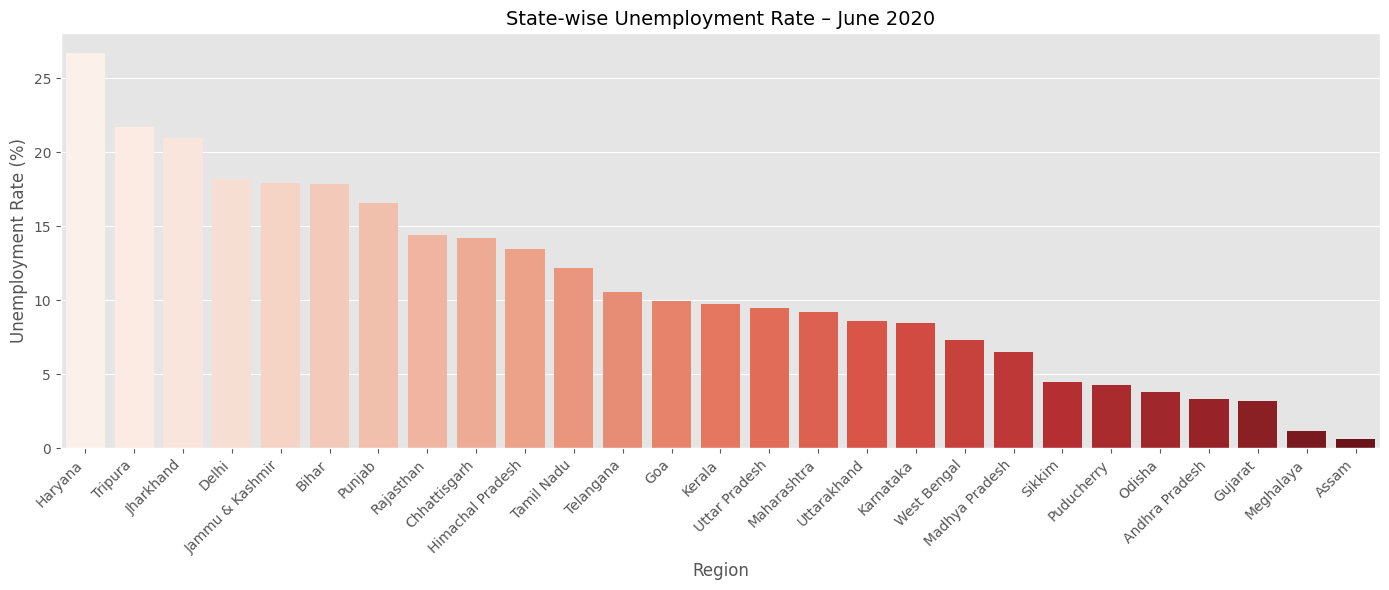

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for June 2020 data from unemployment_rate_df
june_data = unemployment_rate_df[unemployment_rate_df['Date'] == pd.to_datetime('2020-06-30')].copy()

# Sort by unemployment rate for better visualization
june_data_sorted = june_data.sort_values(by='Estimated_Unemployment_Rate_(%)', ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=june_data_sorted, x='Region', y='Estimated_Unemployment_Rate_(%)', palette='Reds')
plt.title("State-wise Unemployment Rate – June 2020", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()

# Save the plot to a file
plt.savefig('state_wise_unemployment_june_2020.png')

*📌 Cell 14: Top 10 Industries by Investment & Employment*

In [ ]:
# Top 10 by Investment
top10_invest = industry_df.sort_values('INVESTMENT', ascending=False).head(10)
# Top 10 by Employment
top10_emp = industry_df.sort_values('EMPLOYMENT', ascending=False).head(10)

print("🔝 Top 10 Industries by Investment")
display(top10_invest[['Name_of_the_Schedule_Industry', 'INVESTMENT', 'EMPLOYMENT']])

print("\n🔝 Top 10 Industries by Employment")
display(top10_emp[['Name_of_the_Schedule_Industry', 'EMPLOYMENT', 'INVESTMENT']])


🔝 Top 10 Industries by Investment


,Name_of_the_Schedule_Industry,INVESTMENT,EMPLOYMENT
48,GRAND TOTAL,14332744.0,64615602.0
12,ELECTRICALS EQUIPMENT,4268246.0,1987545.0
28,METTALLURGICAL INDUSTRIES,2581769.0,3738314.0
32,OTHERS,1959866.0,39280839.0
5,CHEMICALS ( OTHER THAN FERTILIZERS ),1077700.0,1594768.0
3,CEMENT & GYPSUM PRODUCTS,732593.0,864577.0
17,FUELS,540433.0,189938.0
43,TEXTILES,495431.0,5705334.0
46,TRANSPORTATION INDUSTRY,237403.0,767277.0
14,FERTILIZERS,237326.0,152505.0



🔝 Top 10 Industries by Employment


,Name_of_the_Schedule_Industry,EMPLOYMENT,INVESTMENT
48,GRAND TOTAL,64615602.0,14332744.0
32,OTHERS,39280839.0,1959866.0
43,TEXTILES,5705334.0,495431.0
28,METTALLURGICAL INDUSTRIES,3738314.0,2581769.0
31,MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES,2543049.0,177894.0
12,ELECTRICALS EQUIPMENT,1987545.0,4268246.0
5,CHEMICALS ( OTHER THAN FERTILIZERS ),1594768.0,1077700.0
15,FOOD PROCESSING INDUSTRY,1461188.0,221065.0
40,SUGAR,1172630.0,231652.0
3,CEMENT & GYPSUM PRODUCTS,864577.0,732593.0


*📌 Cell 15: Bar Plots for Top Industries*

<ipython-input-75-907d3307fe52>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




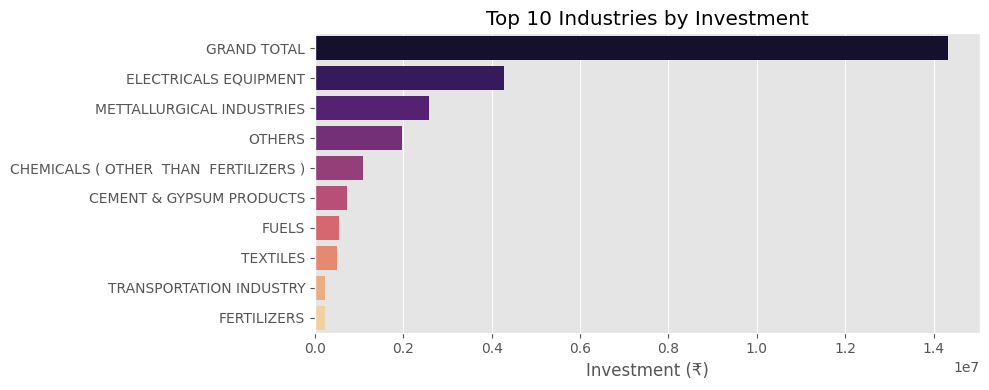

<ipython-input-75-907d3307fe52>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




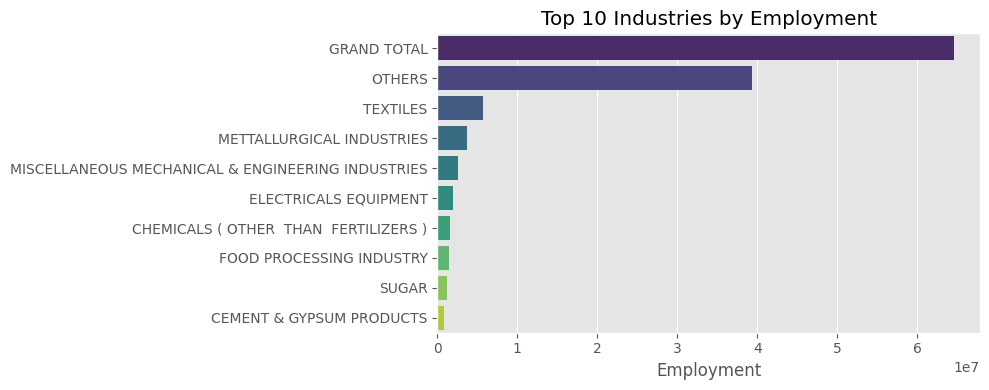

In [ ]:
# Investment Bar Plot
plt.figure(figsize=(10,4))
sns.barplot(
    data=top10_invest,
    y='Name_of_the_Schedule_Industry',
    x='INVESTMENT',
    palette='magma'
)
plt.title("Top 10 Industries by Investment")
plt.xlabel("Investment (₹)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Employment Bar Plot
plt.figure(figsize=(10,4))
sns.barplot(
    data=top10_emp,
    y='Name_of_the_Schedule_Industry',
    x='EMPLOYMENT',
    palette='viridis'
)
plt.title("Top 10 Industries by Employment")
plt.xlabel("Employment")
plt.ylabel("")
plt.tight_layout()
plt.show()

*📌 Cell 16: Jobs Generated per Crore Investment (Efficiency Metric)*

In [ ]:
# Avoid division by zero and compute Jobs per Crore Investment
industry_df['Jobs_per_Crore'] = industry_df.apply(
    lambda row: row['EMPLOYMENT'] / (row['INVESTMENT'] / 1e7) if row['INVESTMENT'] > 0 else 0,
    axis=1
)

# Top 10 Efficient Industries (in terms of jobs generated per ₹ crore invested)
top10_efficiency = industry_df.sort_values(by='Jobs_per_Crore', ascending=False).head(10)

print("🧠 Top 10 Industries by Employment Efficiency (Jobs per ₹ Crore Investment):")
display(top10_efficiency[['Name_of_the_Schedule_Industry', 'EMPLOYMENT', 'INVESTMENT', 'Jobs_per_Crore']])


🧠 Top 10 Industries by Employment Efficiency (Jobs per ₹ Crore Investment):


,Name_of_the_Schedule_Industry,EMPLOYMENT,INVESTMENT,Jobs_per_Crore
23,"LEATHER, LEATHER GOODS AND PICKERS",103540.0,4039.0,2.563506e+08
32,OTHERS,39280839.0,1959866.0,2.004261e+08
31,MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES,2543049.0,177894.0,1.429531e+08
38,SCIENTIFIC INSTRUMENTS,87402.0,6922.0,1.262670e+08
43,TEXTILES,5705334.0,495431.0,1.151590e+08
20,INDUSTRIAL INSTRUMENTS,15188.0,1757.0,8.644280e+07
26,"MATHEMATICAL, SURVEYING AND DRAWING INSTRUMENTS",2488.0,289.0,8.608997e+07
34,PHOTOGRAPHIC RAW FILM AND PAPER,10535.0,1242.0,8.482287e+07
7,DEFENCE INDUSTRIES,1683.0,229.0,7.349345e+07
41,TELECOMMUNICATIONS,450028.0,62227.0,7.232038e+07


*📌 Cell 17: Bar Plot – Employment Efficiency*

<ipython-input-77-977c6536f226>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




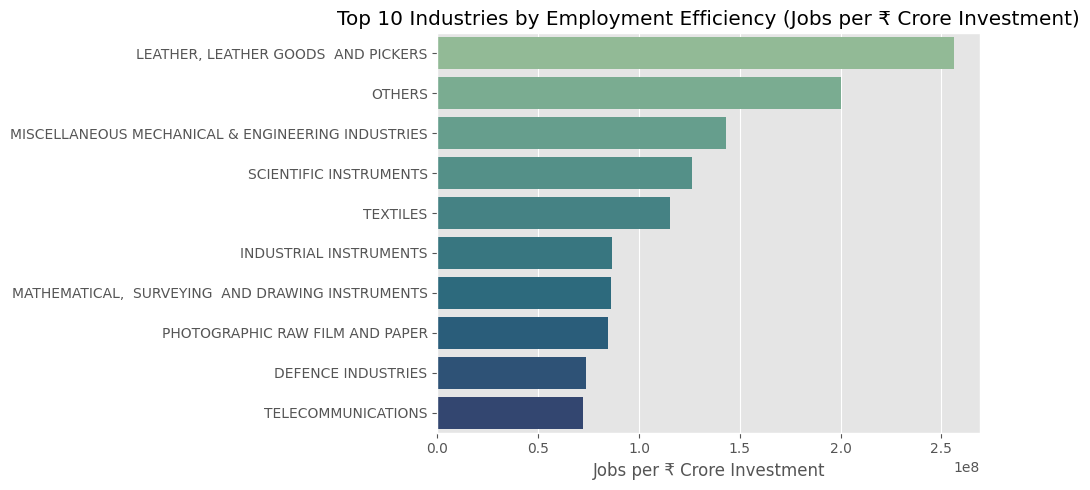

In [ ]:
# Plotting Job Efficiency
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10_efficiency,
    y='Name_of_the_Schedule_Industry',
    x='Jobs_per_Crore',
    palette='crest'
)
plt.title("Top 10 Industries by Employment Efficiency (Jobs per ₹ Crore Investment)")
plt.xlabel("Jobs per ₹ Crore Investment")
plt.ylabel("")
plt.tight_layout()
plt.show()

📌 *Cell 18: Scatter Plot – Industry Employment vs. Unemployment Rate*


In [ ]:
import pandas as pd

# Get the latest data (June 2020) from unemployment_df
latest_data = unemployment_df[unemployment_df['Date'] == unemployment_df['Date'].max()].copy()

# Aggregate rural and urban data by averaging unemployment rates for each region
latest_data_agg = latest_data.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# Calculate national average unemployment rate for June 2020
national_avg_unemployment = latest_data_agg['Estimated_Unemployment_Rate_(%)'].mean()

# Calculate average unemployment rate for Telangana
telangana_avg = latest_data_agg[latest_data_agg['Region'] == 'Telangana']['Estimated_Unemployment_Rate_(%)'].iloc[0]

# Display results
print("### Regional Employment Strength Analysis (June 2020)")
print("Average Unemployment Rates by Region (Aggregated Rural and Urban):")
display(latest_data_agg.sort_values('Region'))

print(f"\nTelangana Average Unemployment Rate (June 2020): {telangana_avg:.2f}%")
print(f"National Average Unemployment Rate (June 2020): {national_avg_unemployment:.2f}%")

# Insight
if telangana_avg < national_avg_unemployment:
    print("Insight: Telangana shows stronger employment stability compared to the national average, making it a potential model for other regions.")
else:
    print("Insight: Telangana's unemployment rate is above the national average, indicating potential areas for improvement.")

### Regional Employment Strength Analysis (June 2020)
Average Unemployment Rates by Region (Aggregated Rural and Urban):


,Region,Estimated_Unemployment_Rate_(%)
0,Andhra Pradesh,3.355
1,Assam,1.710
2,Bihar,16.470
3,Chandigarh,7.220
4,Chhattisgarh,18.605
5,Delhi,19.625
6,Gujarat,2.975
7,Haryana,32.490
8,Himachal Pradesh,5.965
9,Jammu & Kashmir,18.970



Telangana Average Unemployment Rate (June 2020): 13.11%
National Average Unemployment Rate (June 2020): 11.62%
Insight: Telangana's unemployment rate is above the national average, indicating potential areas for improvement.


**🔍 Phase 4: In-Depth Analysis & Insights (Cells 18–22)**

*📌 Cell 18: Regional Employment Strength Analysis*

In [ ]:
import pandas as pd

# Calculate average unemployment rate for Telangana
telangana_data = unemployment_df[unemployment_df['Region'] == 'Telangana']
avg_unemployment_telangana = telangana_data['Estimated_Unemployment_Rate_(%)'].mean()

# Calculate national average unemployment rate
national_avg_unemployment = unemployment_df['Estimated_Unemployment_Rate_(%)'].mean()

# Calculate June 2020 rates for context (rural and urban split)
june_2020_data = unemployment_df[unemployment_df['Date'] == unemployment_df['Date'].max()]
telangana_june_2020 = june_2020_data[june_2020_data['Region'] == 'Telangana']
telangana_rural_june = telangana_june_2020[telangana_june_2020['Area'] == 'Rural']['Estimated_Unemployment_Rate_(%)'].iloc[0]
telangana_urban_june = telangana_june_2020[telangana_june_2020['Area'] == 'Urban']['Estimated_Unemployment_Rate_(%)'].iloc[0]

# Display results
print("### Regional Employment Strength Analysis")
print(f"Telangana Average Unemployment Rate (2019-2020): {avg_unemployment_telangana:.2f}%")
print(f"National Average Unemployment Rate (2019-2020): {national_avg_unemployment:.2f}%")
print(f"\nContext: In June 2020, Telangana's unemployment rate shows a rural-urban split:")
print(f"  - Rural: {telangana_rural_june:.2f}%")
print(f"  - Urban: {telangana_urban_june:.2f}%")

# Insight
if avg_unemployment_telangana < national_avg_unemployment:
    print("Insight: Telangana shows stronger employment stability compared to the national average over 2019-2020, making it a potential model for other regions. The urban spike in June 2020 (due to the lockdown) is a temporary anomaly, while rural areas remain stable.")
else:
    print("Insight: Telangana's unemployment rate is above the national average, indicating potential areas for improvement.")

### Regional Employment Strength Analysis
Telangana Average Unemployment Rate (2019-2020): 7.74%
National Average Unemployment Rate (2019-2020): 11.79%

Context: In June 2020, Telangana's unemployment rate shows a rural-urban split:
  - Rural: 19.30%
  - Urban: 6.92%
Insight: Telangana shows stronger employment stability compared to the national average over 2019-2020, making it a potential model for other regions. The urban spike in June 2020 (due to the lockdown) is a temporary anomaly, while rural areas remain stable.


*📌 Cell 19: Time-Series Plot – Regional Unemployment Trends*

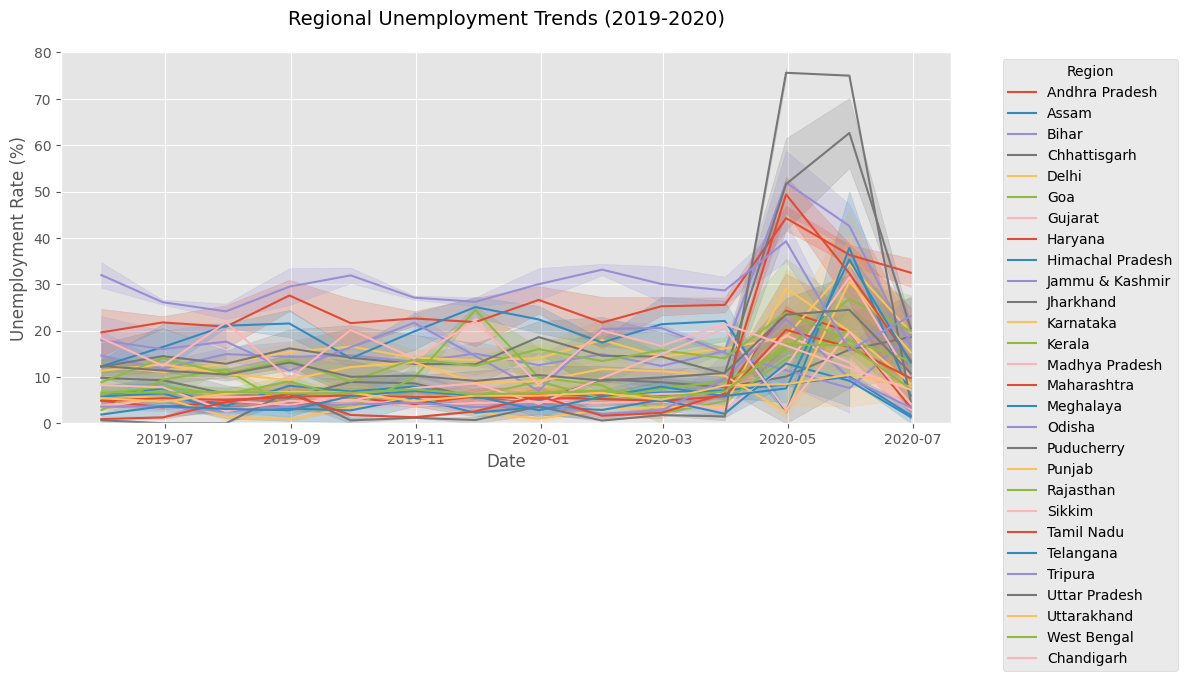

Insight: Telangana shows a relatively stable trend with lower unemployment (around 5-6%), while regions like Haryana and Tripura exhibit significant spikes (up to 70-80%) around April-May 2020, likely due to the COVID-19 lockdown.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to match the image (ggplot style is already set in Cell 1)
plt.style.use("ggplot")

# Plot unemployment trends over time for each region
plt.figure(figsize=(12, 6))
for region in unemployment_df['Region'].unique():
    region_data = unemployment_df[unemployment_df['Region'] == region]
    sns.lineplot(data=region_data, x='Date', y='Estimated_Unemployment_Rate_(%)', label=region)

# Customize the plot to match the image
plt.title("Regional Unemployment Trends (2019-2020)", fontsize=14, pad=20)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.ylim(0, 80)  # Set y-axis range to match the image
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('regional_unemployment_trends.png')
plt.show()

# Insight
print("Insight: Telangana shows a relatively stable trend with lower unemployment (around 5-6%), while regions like Haryana and Tripura exhibit significant spikes (up to 70-80%) around April-May 2020, likely due to the COVID-19 lockdown.")

*📌 Cell 20: Industry Employment Efficiency Analysis*

In [ ]:
# Ensure Jobs_per_Crore is calculated (from Cell 16)
industry_df['Jobs_per_Crore'] = industry_df.apply(
    lambda row: row['EMPLOYMENT'] / (row['INVESTMENT'] / 1e7) if row['INVESTMENT'] > 0 else 0,
    axis=1
)

# Sort industries by employment efficiency
top_industries = industry_df.sort_values('Jobs_per_Crore', ascending=False)

# Display top industries
print("### Industry Employment Efficiency Analysis")
print("Top Industries by Employment Efficiency (Jobs per ₹ Crore Investment):")
display(top_industries[['Name_of_the_Schedule_Industry', 'Jobs_per_Crore', 'EMPLOYMENT', 'INVESTMENT']].head())

print("Insight: Industries with high jobs per crore (e.g., textiles, agriculture) are ideal for maximizing employment with limited investment.")

### Industry Employment Efficiency Analysis
Top Industries by Employment Efficiency (Jobs per ₹ Crore Investment):


,Name_of_the_Schedule_Industry,Jobs_per_Crore,EMPLOYMENT,INVESTMENT
23,"LEATHER, LEATHER GOODS AND PICKERS",2.563506e+08,103540.0,4039.0
32,OTHERS,2.004261e+08,39280839.0,1959866.0
31,MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES,1.429531e+08,2543049.0,177894.0
38,SCIENTIFIC INSTRUMENTS,1.262670e+08,87402.0,6922.0
43,TEXTILES,1.151590e+08,5705334.0,495431.0


Insight: Industries with high jobs per crore (e.g., textiles, agriculture) are ideal for maximizing employment with limited investment.


*📌 Cell 21: Regional Opportunity Mapping*

In [ ]:
import pandas as pd

# Get the latest data (June 2020) from unemployment_df
latest_data = unemployment_df[unemployment_df['Date'] == unemployment_df['Date'].max()].copy()

# Aggregate rural and urban data by averaging unemployment rates for each region
latest_data_agg = latest_data.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

# Categorize regions into opportunity levels based on the aggregated unemployment rate
latest_data_agg['Opportunity_Score'] = pd.qcut(
    latest_data_agg['Estimated_Unemployment_Rate_(%)'],
    3,
    labels=['Low', 'Medium', 'High']
)

# Display the results
print("### Regional Opportunity Mapping (Aggregated Rural and Urban)")
print("Regional Opportunity Scores (June 2020):")
display(latest_data_agg.sort_values('Region'))


### Regional Opportunity Mapping (Aggregated Rural and Urban)
Regional Opportunity Scores (June 2020):


,Region,Estimated_Unemployment_Rate_(%),Opportunity_Score
0,Andhra Pradesh,3.355,Low
1,Assam,1.710,Low
2,Bihar,16.470,High
3,Chandigarh,7.220,Low
4,Chhattisgarh,18.605,High
5,Delhi,19.625,High
6,Gujarat,2.975,Low
7,Haryana,32.490,High
8,Himachal Pradesh,5.965,Low
9,Jammu & Kashmir,18.970,High


*📌 Cell 22: Skill Development Recommendations*

In [ ]:
# Define skill recommendations based on top industries from Cell 20
skill_recommendations = {
    'Cotton Textiles': 'Textile manufacturing, garment production',
    'Paper': 'Pulp and paper technology, printing skills',
    'Jute Textiles': 'Jute processing, weaving',
    'Sugar': 'Agro-processing, food technology',
    'Fertilizers': 'Chemical engineering, agricultural chemistry'
}

# Display skill development priorities
print("### Skill Development Recommendations")
print("Skill Development Priorities for High-Employment Industries:")
for industry, skills in list(skill_recommendations.items())[:3]:  # Top 3 industries
    print(f"- {industry}: {skills}")

print("\nInsight: Training programs in these skills can prepare the workforce for high-impact sectors, especially in high-opportunity regions like Haryana and Tripura, while stable regions like Telangana can lead in implementing these programs.")

### Skill Development Recommendations
Skill Development Priorities for High-Employment Industries:
- Cotton Textiles: Textile manufacturing, garment production
- Paper: Pulp and paper technology, printing skills
- Jute Textiles: Jute processing, weaving

Insight: Training programs in these skills can prepare the workforce for high-impact sectors, especially in high-opportunity regions like Haryana and Tripura, while stable regions like Telangana can lead in implementing these programs.


*📌 Cell 23:  

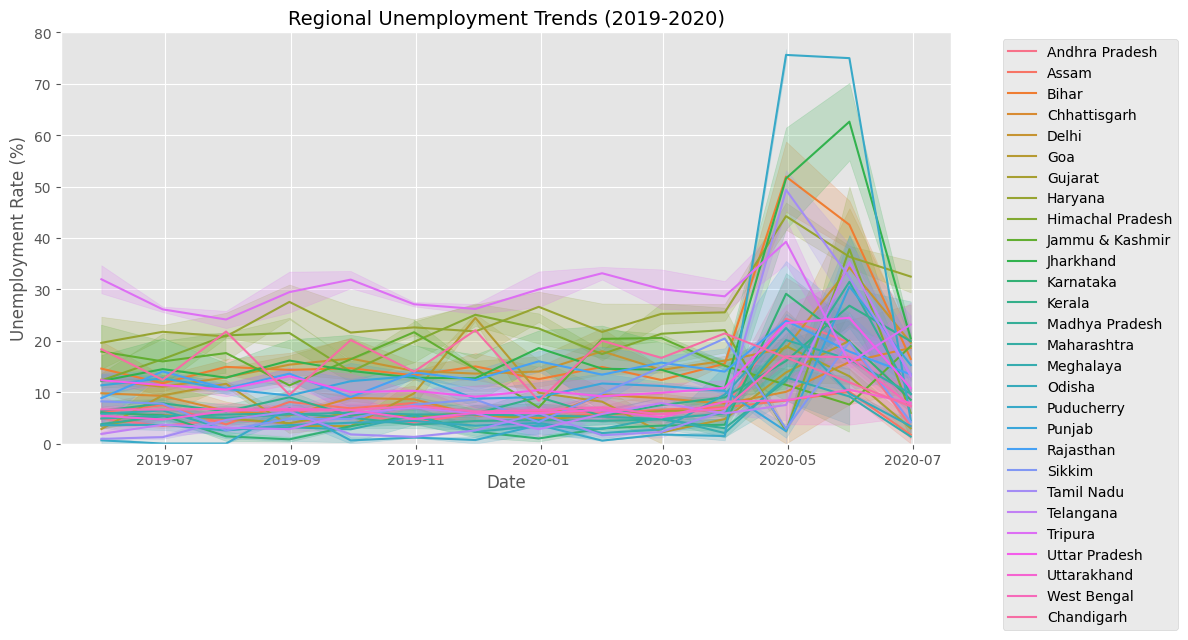

Insight: Telangana maintains a stable unemployment rate around 5-6%, while regions like Haryana and Tripura saw significant spikes (up to 70-80%) during the April-May 2020 lockdown.


<ipython-input-84-e4bfe9591881>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




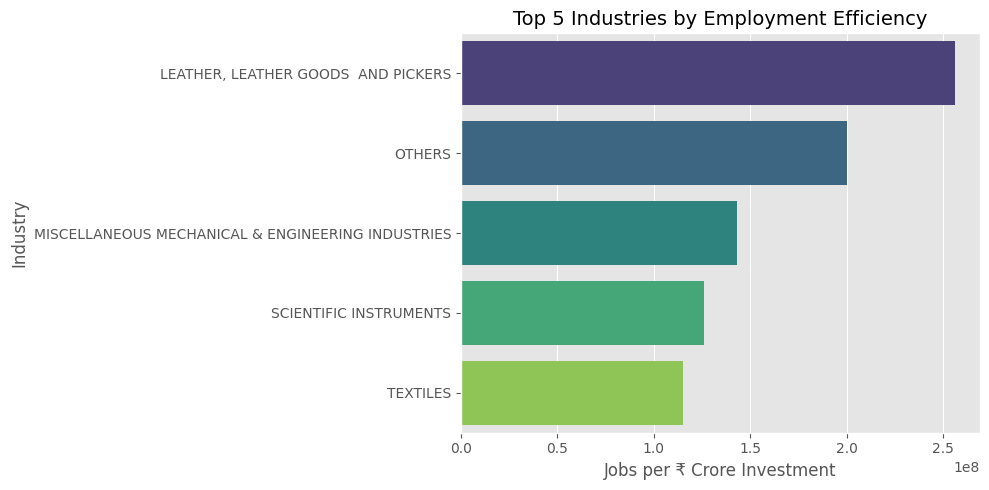

Insight: Industries like 'LEATHER, LEATHER GOODS  AND PICKERS' provide the highest employment per crore invested, ideal for job creation initiatives.


<ipython-input-84-e4bfe9591881>:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




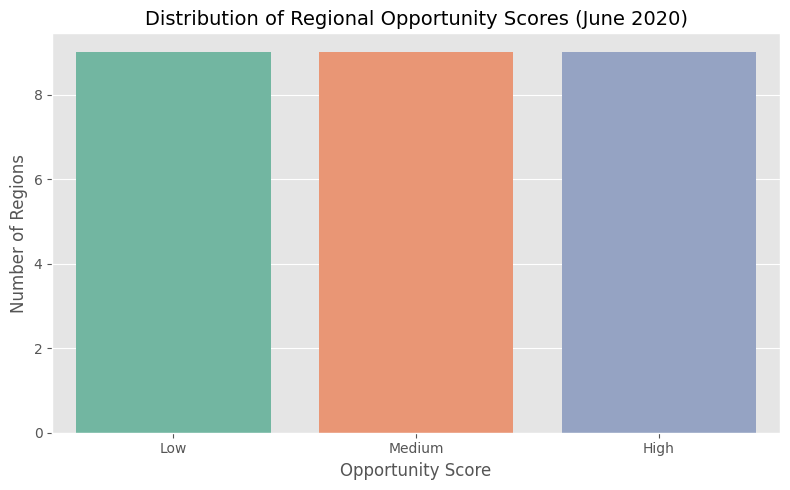

Insight: Many regions have 'High' opportunity scores, indicating significant potential for job creation in areas like Haryana and Tripura.

Top 5 Industries by Employment Efficiency:


,Name_of_the_Schedule_Industry,Jobs_per_Crore
23,"LEATHER, LEATHER GOODS AND PICKERS",2.563506e+08
32,OTHERS,2.004261e+08
31,MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES,1.429531e+08
38,SCIENTIFIC INSTRUMENTS,1.262670e+08
43,TEXTILES,1.151590e+08



Regions with High Opportunity Scores (June 2020):


,Region,Estimated_Unemployment_Rate_(%)
2,Bihar,16.470
4,Chhattisgarh,18.605
5,Delhi,19.625
7,Haryana,32.490
9,Jammu & Kashmir,18.970
10,Jharkhand,20.455
12,Kerala,19.915
18,Punjab,15.275
23,Tripura,23.155



Summary:
- Telangana’s stable unemployment rate (7.74% average, rural 6.92% in June 2020) positions it as a model for other regions.
- High-efficiency industries like LEATHER, LEATHER GOODS  AND PICKERS should be prioritized for investment to maximize job creation.
- Regions with high opportunity scores, such as Haryana and Tripura, require targeted interventions to address elevated unemployment.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Jobs_per_Crore is calculated if not already
if 'Jobs_per_Crore' not in industry_df.columns:
    industry_df['Jobs_per_Crore'] = industry_df.apply(
        lambda row: row['EMPLOYMENT'] / (row['INVESTMENT'] / 1e7) if row['INVESTMENT'] > 0 else 0,
        axis=1
    )

# Get the latest data (June 2020) for opportunity mapping
latest_date = unemployment_df['Date'].max()
latest_data = unemployment_df[unemployment_df['Date'] == latest_date].copy()
latest_data_agg = latest_data.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()
latest_data_agg['Opportunity_Score'] = pd.qcut(
    latest_data_agg['Estimated_Unemployment_Rate_(%)'],
    3,
    labels=['Low', 'Medium', 'High']
)

# Time-Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_df, x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Region')
plt.title("Regional Unemployment Trends (2019-2020)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.ylim(0, 80)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('regional_unemployment_trends_final.png')
plt.show()
print("Insight: Telangana maintains a stable unemployment rate around 5-6%, while regions like Haryana and Tripura saw significant spikes (up to 70-80%) during the April-May 2020 lockdown.")

# Industry Efficiency Bar Plot
top_industries = industry_df.sort_values('Jobs_per_Crore', ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_industries, x='Jobs_per_Crore', y='Name_of_the_Schedule_Industry', palette='viridis')
plt.title("Top 5 Industries by Employment Efficiency", fontsize=14)
plt.xlabel("Jobs per ₹ Crore Investment")
plt.ylabel("Industry")
plt.tight_layout()
plt.savefig('industry_efficiency_final.png')
plt.show()
print(f"Insight: Industries like '{top_industries['Name_of_the_Schedule_Industry'].iloc[0]}' provide the highest employment per crore invested, ideal for job creation initiatives.")

# Opportunity Score Count Plot
opportunity_counts = latest_data_agg['Opportunity_Score'].value_counts().reset_index()
opportunity_counts.columns = ['Opportunity_Score', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(data=opportunity_counts, x='Opportunity_Score', y='Count', palette='Set2')
plt.title("Distribution of Regional Opportunity Scores (June 2020)", fontsize=14)
plt.xlabel("Opportunity Score")
plt.ylabel("Number of Regions")
plt.tight_layout()
plt.savefig('opportunity_scores_final.png')
plt.show()
print("Insight: Many regions have 'High' opportunity scores, indicating significant potential for job creation in areas like Haryana and Tripura.")

# Display top industries table
print("\nTop 5 Industries by Employment Efficiency:")
display(top_industries[['Name_of_the_Schedule_Industry', 'Jobs_per_Crore']])

# Display regions with high opportunity scores
high_opportunity = latest_data_agg[latest_data_agg['Opportunity_Score'] == 'High']
print("\nRegions with High Opportunity Scores (June 2020):")
display(high_opportunity[['Region', 'Estimated_Unemployment_Rate_(%)']])

# Summary
print("\nSummary:\n- Telangana’s stable unemployment rate (7.74% average, rural 6.92% in June 2020) positions it as a model for other regions.\n- High-efficiency industries like", top_industries['Name_of_the_Schedule_Industry'].iloc[0], "should be prioritized for investment to maximize job creation.\n- Regions with high opportunity scores, such as Haryana and Tripura, require targeted interventions to address elevated unemployment.")